Load the testing data (Unseen data)

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import numpy
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import r2_score
import sys
import numpy as np
import pandas
from numpy import *
import time
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import feature_selection

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Lasso,LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
import xgboost
from xgboost import XGBRegressor
from xgboost import plot_tree
from sklearn.learning_curve import learning_curve, validation_curve
from sklearn.cross_validation import cross_val_predict
from sklearn import metrics, grid_search, cross_validation
from IPython.display import set_matplotlib_formats
from bokeh.plotting import figure, show, output_notebook
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score
from bokeh.layouts import gridplot
output_notebook()
set_matplotlib_formats('png', 'pdf')
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 6)
sys.path.append("./data")
plt.rcParams['figure.figsize'] = (15, 10)

Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5005)


Loading BokehJS ...

# Load the Data

In [2]:
X_train = np.load('./data/X_train.npy')
y_train = np.load('./data/y_train.npy')
X_deploy = np.load('./data/X_test.npy')
y_deploy = np.load('./data/y_test.npy')

print 'Number of training examples',len(X_train)
print 'Number of testing examples',len(X_deploy)

Number of training examples 167
Number of testing examples 42


In [3]:
XGBR = XGBRegressor()
XGBR.fit(X_train, y_train)
# plot single tree
#plot_tree(XGBR)
#plt.show()

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

# Initialize the classifiers as the training time


In [4]:
# Ada boost
ada_boost = AdaBoostRegressor(n_estimators = 5, loss = "exponential")
ada_boost.fit(X_train, y_train)
# Bagging
bagging = BaggingRegressor(n_estimators = 5)
bagging.fit(X_train, y_train)
# Decision tree
DT =  DecisionTreeRegressor(min_samples_split = 3, max_depth = 7, min_samples_leaf =1 )
DT.fit(X_train, y_train)
# K nearst neighbours regression
KNN = KNeighborsRegressor(n_neighbors = 4, algorithm = 'kd_tree')
KNN.fit(X_train, y_train)
# Kernel KernelRidge regression
KKR = KernelRidge(kernel='rbf', gamma=0.052, alpha =  0.0216)
KKR.fit(X_train, y_train)
# LASSO Regression
LASSO = Lasso(alpha = 0.2631578947368459, precompute = False)
LASSO.fit(X_train, y_train)
# Ordinary Least Squares  
LR = LinearRegression()
LR.fit(X_train, y_train)
# SVM regrsiion
SVMR = SVR(kernel = "linear", C = 5.0 )
SVMR.fit(X_train, y_train)
# Xgboost
Xbost = xgboost.XGBRegressor()
Xbost.fit(X_train, y_train)
# Bayesian Ridge Regression
Bayesian = BayesianRidge(lambda_1 = 1.0, lambda_2 = -1.0, alpha_1 = -1.0, alpha_2=-1.0)
Bayesian.fit(X_train, y_train)

BayesianRidge(alpha_1=-1.0, alpha_2=-1.0, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1.0, lambda_2=-1.0, n_iter=300,
       normalize=False, tol=0.001, verbose=False)

In [5]:
import seaborn as sns
import numpy as np
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

from keras.utils import np_utils                                      
labelsTrain =  y_train
labelsDepy =   y_deploy                                         
model = Sequential()
model.add(Dense(40, input_dim=7, init='normal', activation='relu'))
model.add(Dense(1, init='normal'))

model.load_weights('Boston_House_Modelbest.hdf5')
model.compile(loss='mean_squared_error', optimizer='adam')

In [6]:
# MAB_NN(3.33%REMOVED) MODEL1    1               
model1 = Sequential()
model1.add(Dense(40, input_dim=7, init='normal', activation='relu'))
model1.add(Dense(1, init='normal'))
model1.load_weights('./IrisUCB1/spam0.hdf5')
model1.compile(loss='mean_squared_error', optimizer='adam')

In [7]:
# MAB_NN(16.7%REMOVED) MODEL2 5
model2 = Sequential()
model2.add(Dense(40, input_dim=7, init='normal', activation='relu'))
model2.add(Dense(1, init='normal'))
model2.load_weights('./IrisUCB1/spam4.hdf5')
model2.compile(loss='mean_squared_error', optimizer='adam')

In [8]:
# MAB_NN(33.33%REMOVED) MODEL3 10
model3 = Sequential()
model3.add(Dense(40, input_dim=7, init='normal', activation='relu'))
model3.add(Dense(1, init='normal'))
model3.load_weights('./IrisUCB1/spam9.hdf5')
model3.compile(loss='mean_squared_error', optimizer='adam')

## Deployment Time

In [9]:
# Ada boost
start_time = time.time()
ada_boost = ada_boost.predict(X_deploy)
print("The time of Ada boost is         %s seconds" % (time.time() - start_time))
# Bagging
start_time = time.time()
bagging = bagging.predict(X_deploy)
print("The time of bagging is           %s seconds" % (time.time() - start_time))
# Decision tree
start_time = time.time()
DT = DT.predict(X_deploy)
print("The time of decision tree is     %s seconds" % (time.time() - start_time))
# K nearst neighbours regression
start_time = time.time()
KNN = KNN.predict(X_deploy)
print("The time of KNN is               %s seconds" % (time.time() - start_time))
# Kernel Ridge regression
start_time = time.time()
KKR = KKR.predict(X_deploy)
print("The time of Kernel Ridge is      %s seconds" % (time.time() - start_time))
# LASSO Regression
start_time = time.time()
LASSO = LASSO.predict(X_deploy)
print("The time of LASSO is             %s seconds" % (time.time() - start_time))
# Ordinary Least Squares  
start_time = time.time()
LR = LR.predict(X_deploy)
print("The time of Ordi. Least Sq. is  %s seconds" % (time.time() - start_time))
# SVM regrsiion
start_time = time.time()
SVMR = SVMR.predict(X_deploy)
print("The time of SVM is               %s seconds" % (time.time() - start_time))
# Xgboost
start_time = time.time()
Xbost = Xbost.predict(X_deploy)
print("The time of Xgboost is           %s seconds" % (time.time() - start_time))



# Bayesian Ridge Regression
start_time = time.time()
Bayesian = Bayesian.predict(X_deploy)
print("The time of Bayesian is          %s seconds" % (time.time() - start_time))




# NN
start_time = time.time()
modell = model.predict(X_deploy)
print("The time of NN is                %s seconds" % (time.time() - start_time))
start_time = time.time()
modell1 = model1.predict(X_deploy)
print("The time of NN3.33 is            %s seconds" % (time.time() - start_time))
start_time = time.time()
modell2 = model2.predict(X_deploy)
print("The time of NN16.7 is             %s seconds" % (time.time() - start_time))
start_time = time.time()
modell3 = model3.predict(X_deploy)
print("The time of NN33.3 is            %s seconds" % (time.time() - start_time))

The time of Ada boost is         0.000572919845581 seconds
The time of bagging is           0.000722885131836 seconds
The time of decision tree is     0.000185012817383 seconds
The time of KNN is               0.000611066818237 seconds
The time of Kernel Ridge is      0.000619173049927 seconds
The time of LASSO is             0.000233173370361 seconds
The time of Ordi. Least Sq. is  0.000174045562744 seconds
The time of SVM is               0.000332117080688 seconds
The time of Xgboost is           0.00190401077271 seconds
The time of Bayesian is          0.000184059143066 seconds
The time of NN is                0.155811071396 seconds
The time of NN3.33 is            0.0711810588837 seconds
The time of NN16.7 is             0.114305019379 seconds
The time of NN33.3 is            0.0444779396057 seconds


# R_squared of the models on Testing data

In [10]:
predicted = model.predict(X_deploy)
r_squared = r2_score(y_deploy, predicted, multioutput='variance_weighted')

In [11]:
print "The r_squared of Ada boost:       \t", r2_score(y_deploy, ada_boost, multioutput='variance_weighted')
print "The r_squared of bagging:         \t", r2_score(y_deploy, bagging, multioutput='variance_weighted')
print "The r_squared of decision tree:   \t", r2_score(y_deploy, DT, multioutput='variance_weighted')
print "The r_squared of KNN:             \t", r2_score(y_deploy, KNN, multioutput='variance_weighted')
print "The r_squared of Kernel Ridge:    \t", r2_score(y_deploy, KKR, multioutput='variance_weighted')
print "The r_squared of LASSO:           \t", r2_score(y_deploy, LASSO, multioutput='variance_weighted')
print "The r_squared of Ordi. Least Sq.: \t", r2_score(y_deploy, LR, multioutput='variance_weighted')
print "The r_squared of SVM:             \t", r2_score(y_deploy, SVMR, multioutput='variance_weighted')
print "The r_squared of Xgboost:         \t", r2_score(y_deploy, Xbost, multioutput='variance_weighted')
print "The r_squared of Bayesian Ridge : \t", r2_score(y_deploy, Bayesian, multioutput='variance_weighted')
print "The r_squared of NN:              \t", r2_score(y_deploy, modell, multioutput='variance_weighted')
print "The r_squared of NN3.33:          \t", r2_score(y_deploy, modell1, multioutput='variance_weighted')
print "The r_squared of NN16.7:          \t", r2_score(y_deploy, modell2, multioutput='variance_weighted')
print "The r_squared of NN33.3:          \t", r2_score(y_deploy, modell3, multioutput='variance_weighted')

The r_squared of Ada boost:       	0.843750470773
The r_squared of bagging:         	0.897310432276
The r_squared of decision tree:   	0.909935238851
The r_squared of KNN:             	0.890525913809
The r_squared of Kernel Ridge:    	0.807478256384
The r_squared of LASSO:           	0.904368488839
The r_squared of Ordi. Least Sq.: 	0.902125405611
The r_squared of SVM:             	0.937191925218
The r_squared of Xgboost:         	0.920264775595
The r_squared of Bayesian Ridge : 	-0.0178827592196
The r_squared of NN:              	0.940692494748
The r_squared of NN3.33:          	0.948506493226
The r_squared of NN16.7:          	0.941109733843
The r_squared of NN33.3:          	0.844637779477


# Plot the results

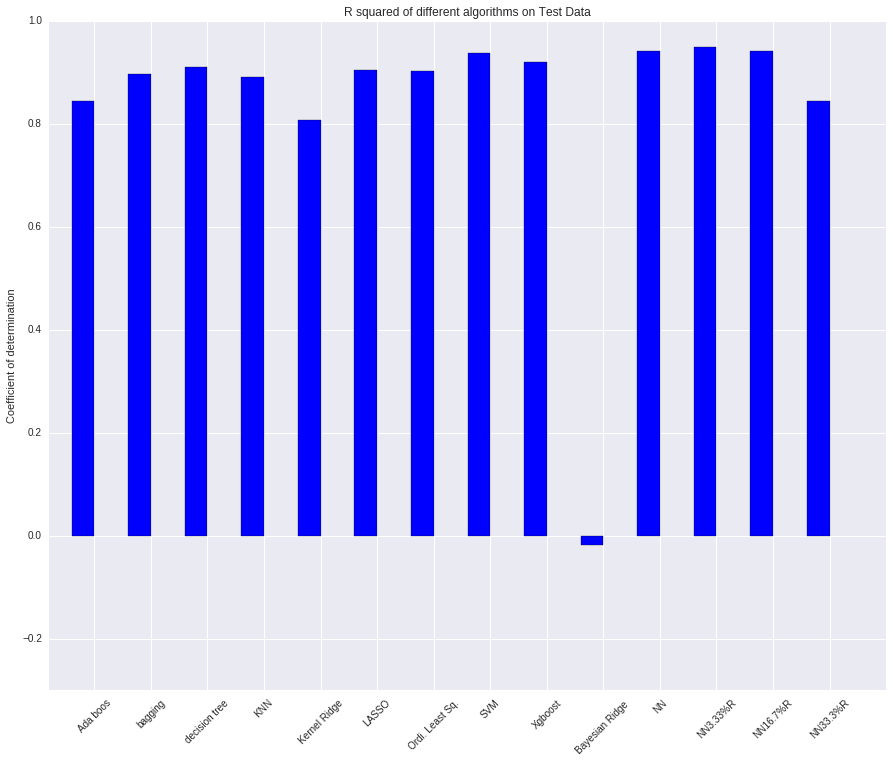

In [13]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = (15, 6)
ax = fig.add_subplot(111)

accData = [r2_score(y_deploy, ada_boost, multioutput='variance_weighted'),
           r2_score(y_deploy, bagging, multioutput='variance_weighted'),
           r2_score(y_deploy, DT, multioutput='variance_weighted'),
           r2_score(y_deploy, KNN, multioutput='variance_weighted'),
           r2_score(y_deploy, KKR, multioutput='variance_weighted'),
           r2_score(y_deploy, LASSO, multioutput='variance_weighted'),
           r2_score(y_deploy, LR, multioutput='variance_weighted'),
           r2_score(y_deploy, SVMR, multioutput='variance_weighted'),
           r2_score(y_deploy, Xbost, multioutput='variance_weighted'),
           r2_score(y_deploy, Bayesian, multioutput='variance_weighted'),
           r2_score(y_deploy, modell, multioutput='variance_weighted'),
           r2_score(y_deploy, modell1, multioutput='variance_weighted'),
           r2_score(y_deploy, modell2, multioutput='variance_weighted'),
           r2_score(y_deploy, modell3, multioutput='variance_weighted')]


N = len(accData)
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.40                     # the width of the bars
## the bars
rects1 = ax.bar(ind, accData, width,
                color='blue',
                #yerr=menStd,
                error_kw=dict(elinewidth=2,ecolor='red'))

# axes and labels
ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(-0.3,1)
ax.set_ylabel('Coefficient of determination')
ax.set_title('R squared of different algorithms on Test Data')
xTickMarks = ['Ada boos', 'bagging', 'decision tree', 'KNN', 'Kernel Ridge' ,
              'LASSO' , 'Ordi. Least Sq.' , 'SVM' , 'Xgboost' ,'Bayesian Ridge ',
              'NN', 'NN3.33%R' , 'NN16.7%R' , 'NN33.3%R']
ax.set_xticks(ind+width)
plt.rcParams['figure.figsize'] = (15, 12)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)
plt.show()